In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [2]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

In [4]:
#pip install opencv-python

In [5]:
#pip install pydot

In [6]:
#pip install visualkeras

In [7]:
#pip install keras_tuner

In [8]:
import pydot
import graphviz
import visualkeras
from collections import defaultdict
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)

In [9]:
from keras import models
from keras import layers
import keras
#from kerastuner.tuners import RandomSearch
#import keras_tuner as kt

In [10]:
print(tf.__version__)

2.8.0


In [11]:
train_data_dir = 'train_binary/'

In [12]:
validation_data_dir = 'val_binary/'

In [13]:
initializer = tf.keras.initializers.GlorotUniform(seed=0)

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(96, (5, 5), activation='relu', padding='same', input_shape=(15, 1486, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization(momentum=0.9))

model.add(layers.Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))

model.add(layers.Conv2D(192, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))

model.add(layers.Conv2D(384, (4, 4), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2),padding='same'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 1486, 96)      7296      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 743, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 7, 743, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 743, 128)       307328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 372, 128)      0         
 2D)                                                             
                                                        

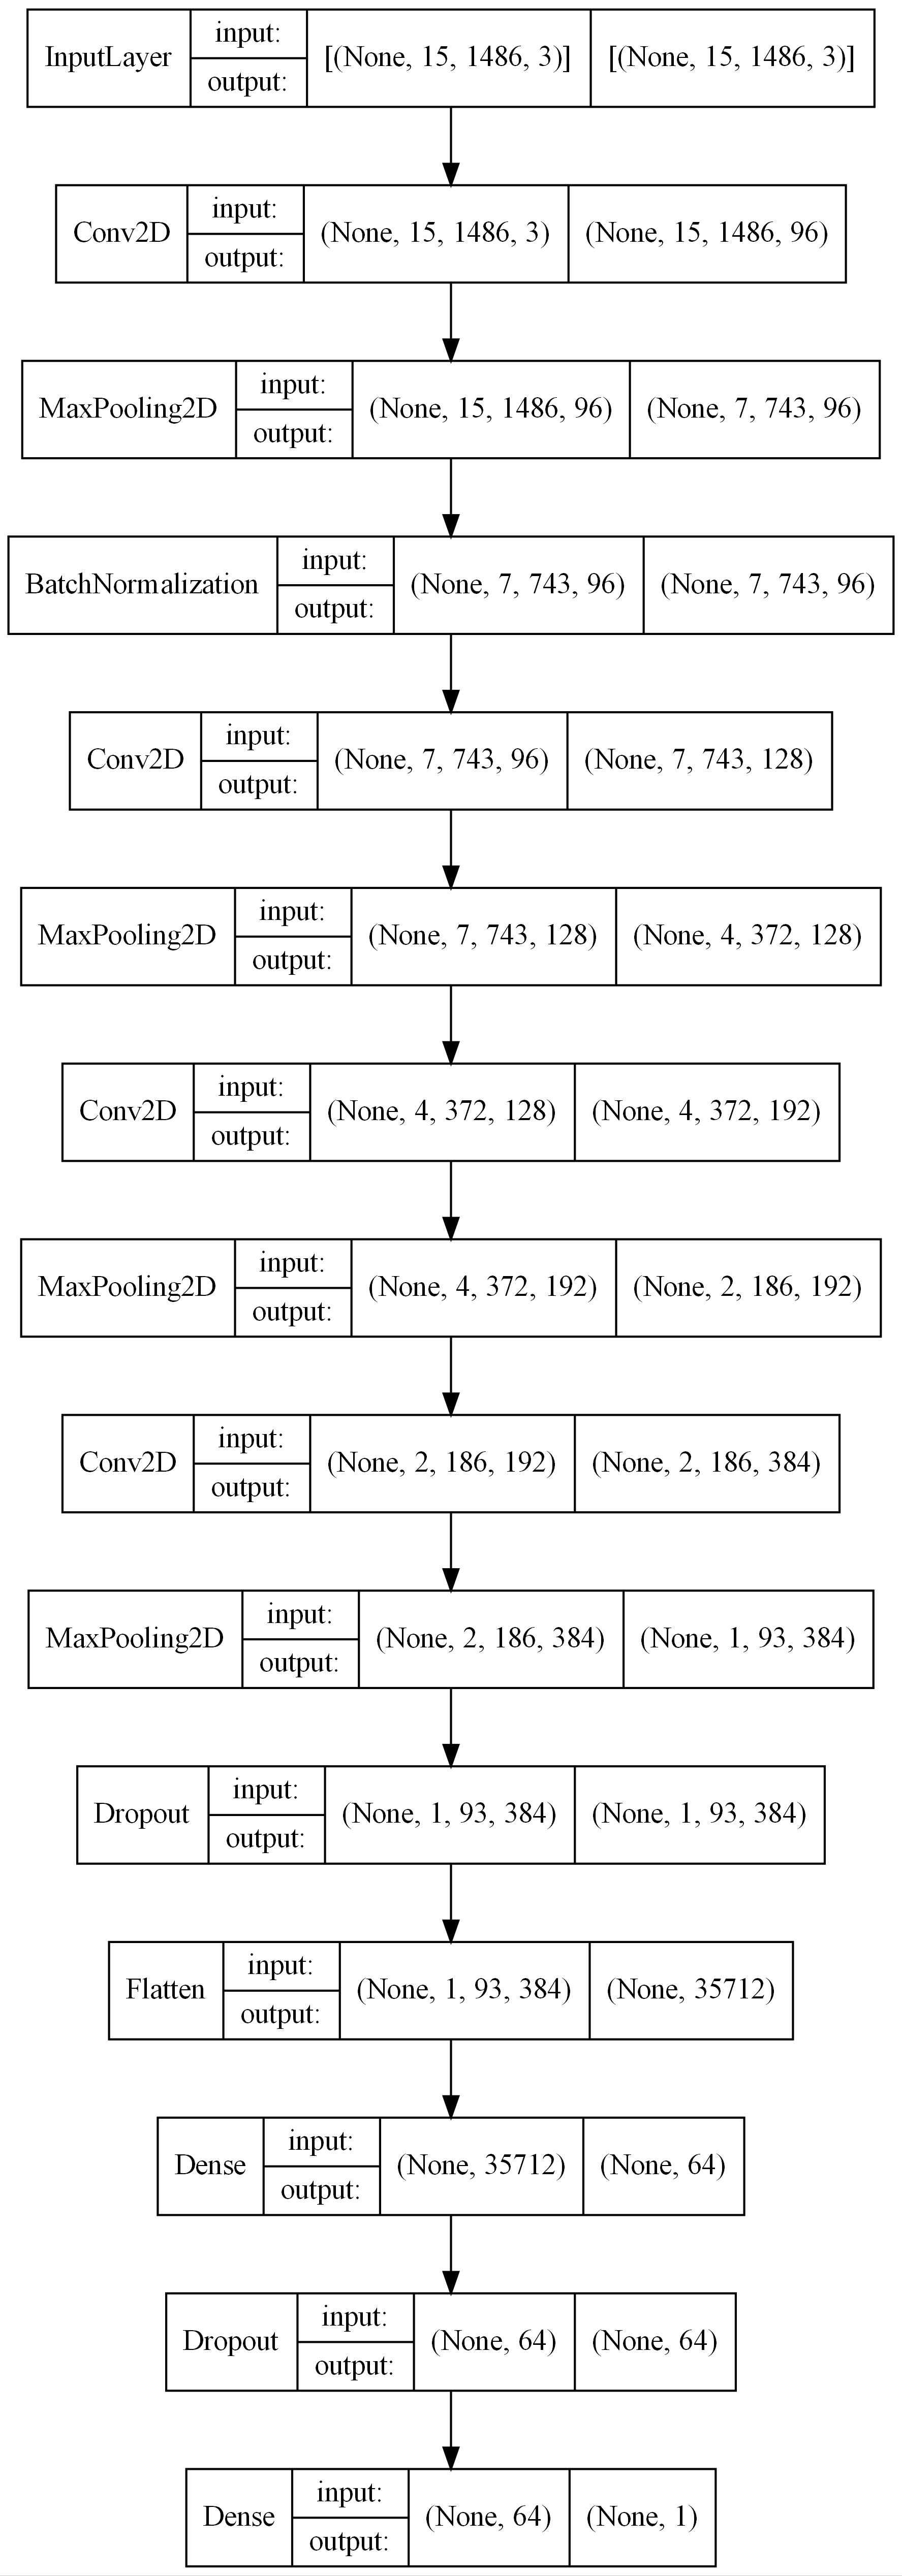

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.jpg', show_shapes=True, show_layer_names=False, dpi =300)

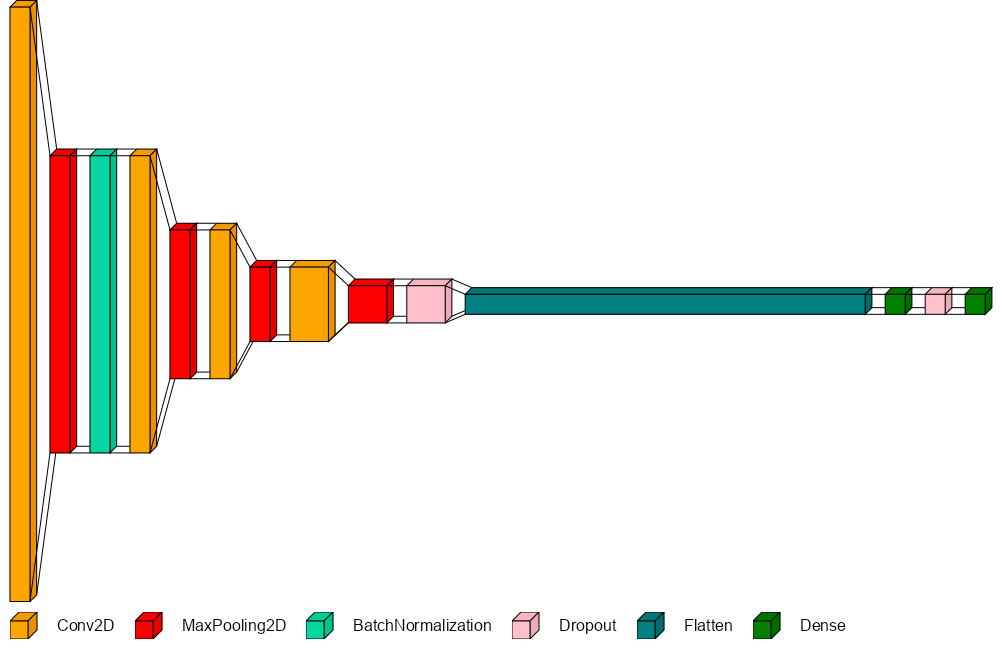

In [18]:
font = ImageFont.truetype("arial.ttf", 16)

color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = 'orange'
color_map[layers.ZeroPadding2D]['fill'] = 'gray'
color_map[layers.Dropout]['fill'] = 'pink'
color_map[layers.MaxPooling2D]['fill'] = 'red'
color_map[layers.Dense]['fill'] = 'green'
color_map[layers.Flatten]['fill'] = 'teal'
visualkeras.layered_view(model, to_file = 'model_architecture.png', legend=True,color_map=color_map, font=font, spacing=20, scale_xy=0.4)

In [ ]:
visualizer

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(15,1486), 
        batch_size=256,
        shuffle=True,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir, 
        target_size=(15,1486), 
        batch_size=256,
        shuffle=True,
        class_mode='binary')

Found 22935 images belonging to 2 classes.
Found 4935 images belonging to 2 classes.


In [46]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=30),
    tf.keras.callbacks.ModelCheckpoint('hyper_results/logs11/model_10th_trial.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='hyper_results/logs11')]


history = model.fit(
      train_generator,  
      epochs=1200,
      verbose=1,
      validation_data = validation_generator, 
      callbacks=my_callbacks
      )

Epoch 1/1200
90/90 [==============================] - 20s 198ms/step - loss: 0.4625 - acc: 0.7794 - val_loss: 0.3437 - val_acc: 0.8399
Epoch 2/1200
90/90 [==============================] - 17s 183ms/step - loss: 0.2160 - acc: 0.9116 - val_loss: 0.1777 - val_acc: 0.9348
Epoch 3/1200
90/90 [==============================] - 17s 185ms/step - loss: 0.1465 - acc: 0.9428 - val_loss: 0.2326 - val_acc: 0.9194
Epoch 4/1200
90/90 [==============================] - 17s 184ms/step - loss: 0.1218 - acc: 0.9520 - val_loss: 0.1492 - val_acc: 0.9487
Epoch 5/1200
90/90 [==============================] - 17s 187ms/step - loss: 0.1076 - acc: 0.9567 - val_loss: 0.2442 - val_acc: 0.9299
Epoch 6/1200
90/90 [==============================] - 17s 185ms/step - loss: 0.0987 - acc: 0.9598 - val_loss: 0.1317 - val_acc: 0.9528
Epoch 7/1200
90/90 [==============================] - 17s 187ms/step - loss: 0.0916 - acc: 0.9626 - val_loss: 0.1308 - val_acc: 0.9536
Epoch 8/1200
90/90 [==============================] - 1

KeyboardInterrupt: 

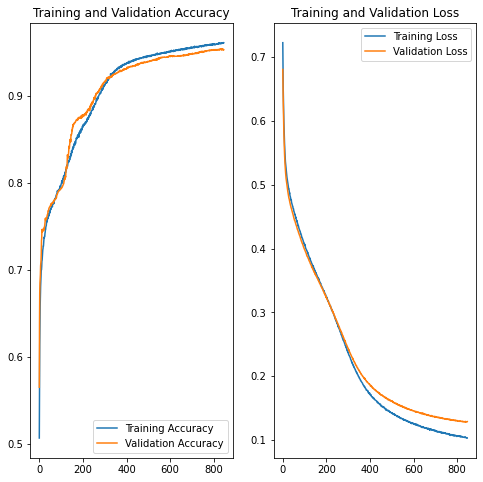

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(847)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
%reload_ext tensorboard

In [27]:
%tensorboard --logdir hyper_results/logs10 --port 7876